In [1]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn import svm

import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
import seaborn as sns

In [2]:
#!conda install pydotplus -y

In [3]:
df=pd.read_csv('datasets/bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
temp=df.columns.values[0]
temp

'age'

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#check not null values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

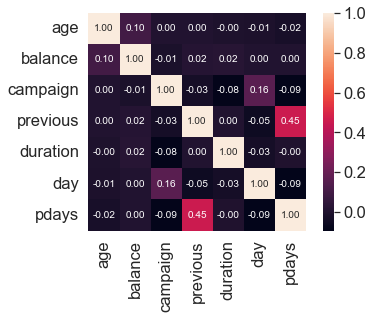

In [7]:
corrmat=df.corr()
k=10 #no. of variable for heatmap

cols=corrmat.nlargest(k,'age')['age'].index
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
heatmap=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

<AxesSubplot:>

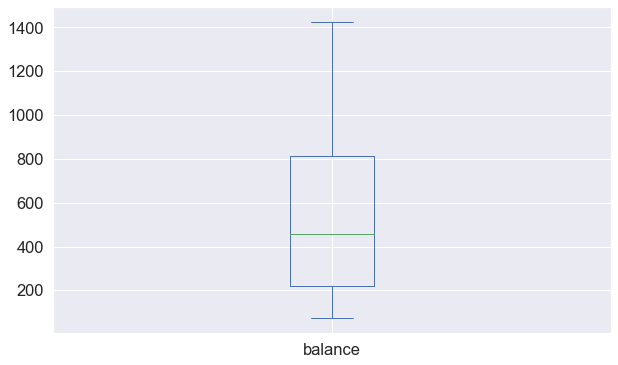

In [53]:
plt.figure(figsize=(10,6))
df.balance.plot(kind='box')

In [54]:
df['balance'].describe()

count     605.000000
mean      544.905785
std       373.870594
min        72.000000
25%       220.000000
50%       459.000000
75%       813.000000
max      1425.000000
Name: balance, dtype: float64

In [55]:
df.drop(df[df['balance']>1428].index, axis=0, inplace=True)  #to remove outlier

In [56]:
df.drop(df[df['balance']<72].index, axis=0, inplace=True)

In [57]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
5212,35,blue-collar,single,secondary,no,773,yes,no,unknown,23,may,136,2,-1,0,unknown,no
5217,39,blue-collar,married,secondary,no,439,yes,no,unknown,23,may,214,3,-1,0,unknown,no
5221,37,technician,single,secondary,no,363,yes,no,unknown,23,may,110,3,-1,0,unknown,no
5224,33,technician,single,tertiary,no,594,yes,yes,unknown,23,may,149,1,-1,0,unknown,no
5227,33,blue-collar,single,secondary,no,372,yes,no,unknown,23,may,92,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44880,38,management,married,tertiary,no,845,no,no,cellular,23,sep,134,1,-1,0,unknown,no
44909,39,technician,married,tertiary,no,386,no,no,cellular,29,sep,201,2,-1,0,unknown,no
45100,34,blue-collar,married,secondary,no,152,no,no,cellular,25,oct,275,1,-1,0,unknown,no
45108,36,technician,married,tertiary,no,844,yes,yes,cellular,25,oct,129,1,-1,0,unknown,no


In [58]:
df.shape

(605, 17)

<AxesSubplot:>

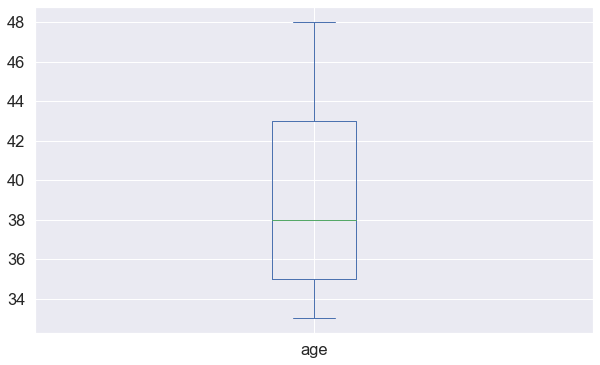

In [59]:
plt.figure(figsize=(10,6))
df.age.plot(kind='box')

In [52]:
df['age'].describe()

count    605.000000
mean      39.019835
std        4.587949
min       33.000000
25%       35.000000
50%       38.000000
75%       43.000000
max       48.000000
Name: age, dtype: float64

In [16]:
df.drop(df[df['age']<32].index, axis=0, inplace=True)

In [17]:
df.drop(df[df['age']>48].index, axis=0, inplace=True)

In [18]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no
26,39,management,single,tertiary,no,255,yes,no,unknown,5,may,296,1,-1,0,unknown,no
29,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45179,34,technician,married,secondary,no,1026,no,no,cellular,12,nov,319,1,100,6,failure,no
45182,34,technician,married,secondary,no,133,no,no,cellular,15,nov,401,2,187,5,success,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes


<AxesSubplot:>

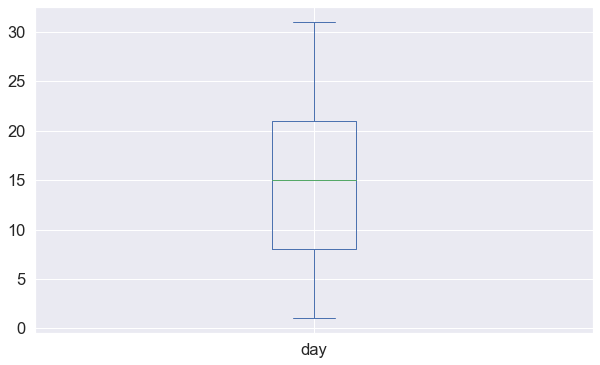

In [19]:
plt.figure(figsize=(10,6))
df.day.plot(kind='box')

In [20]:
df['day'].describe()

count    11508.000000
mean        15.347671
std          8.255932
min          1.000000
25%          8.000000
50%         15.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [21]:
df.drop(df[df['day']<23].index, axis=0, inplace=True)

In [22]:
df.drop(df[df['day']>29].index, axis=0, inplace=True)

In [23]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
5212,35,blue-collar,single,secondary,no,773,yes,no,unknown,23,may,136,2,-1,0,unknown,no
5215,36,blue-collar,single,secondary,no,690,yes,no,unknown,23,may,86,2,-1,0,unknown,no
5217,39,blue-collar,married,secondary,no,439,yes,no,unknown,23,may,214,3,-1,0,unknown,no
5221,37,technician,single,secondary,no,363,yes,no,unknown,23,may,110,3,-1,0,unknown,no
5223,33,technician,single,secondary,no,486,yes,no,unknown,23,may,363,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45108,36,technician,married,tertiary,no,844,yes,yes,cellular,25,oct,129,1,-1,0,unknown,no
45114,36,technician,single,secondary,no,204,yes,no,cellular,26,oct,196,1,144,8,other,no
45119,47,admin.,married,secondary,no,1210,no,no,cellular,26,oct,604,1,91,4,failure,yes
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,unknown,26,oct,17,1,-1,0,unknown,no


<AxesSubplot:>

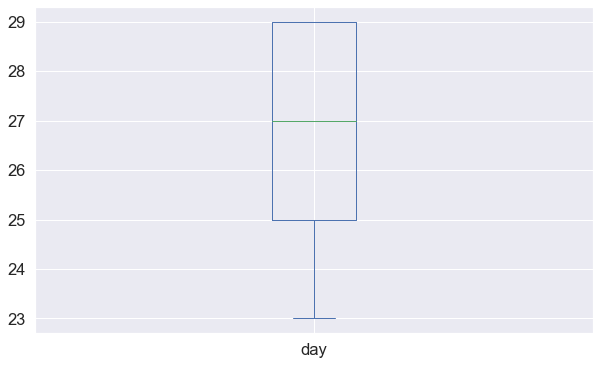

In [24]:
plt.figure(figsize=(10,6))
df.day.plot(kind='box')

In [25]:
df['duration'].describe()

count    1822.000000
mean      231.594951
std       236.329700
min         6.000000
25%        93.000000
50%       160.000000
75%       282.000000
max      3785.000000
Name: duration, dtype: float64

In [26]:
df.drop(df[df['duration']<89].index, axis=0, inplace=True)

In [27]:
df.drop(df[df['duration']>312].index, axis=0, inplace=True)

In [28]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
5212,35,blue-collar,single,secondary,no,773,yes,no,unknown,23,may,136,2,-1,0,unknown,no
5217,39,blue-collar,married,secondary,no,439,yes,no,unknown,23,may,214,3,-1,0,unknown,no
5221,37,technician,single,secondary,no,363,yes,no,unknown,23,may,110,3,-1,0,unknown,no
5224,33,technician,single,tertiary,no,594,yes,yes,unknown,23,may,149,1,-1,0,unknown,no
5227,33,blue-collar,single,secondary,no,372,yes,no,unknown,23,may,92,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44909,39,technician,married,tertiary,no,386,no,no,cellular,29,sep,201,2,-1,0,unknown,no
45100,34,blue-collar,married,secondary,no,152,no,no,cellular,25,oct,275,1,-1,0,unknown,no
45108,36,technician,married,tertiary,no,844,yes,yes,cellular,25,oct,129,1,-1,0,unknown,no
45114,36,technician,single,secondary,no,204,yes,no,cellular,26,oct,196,1,144,8,other,no


<AxesSubplot:>

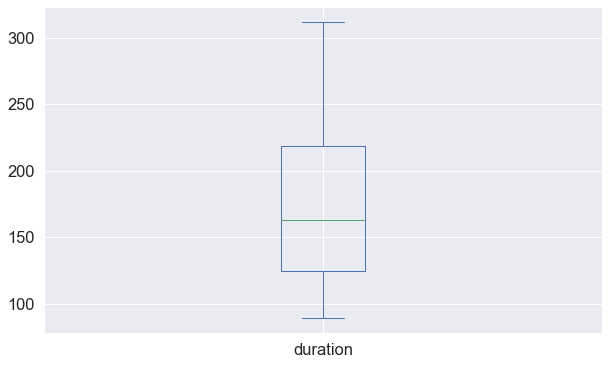

In [29]:
plt.figure(figsize=(10,6))
df.duration.plot(kind='box')

In [30]:
df['campaign'].describe()

count    999.000000
mean       3.231231
std        3.485094
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       50.000000
Name: campaign, dtype: float64

In [31]:
df.drop(df[df['campaign']>3].index, axis=0, inplace=True)

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
5212,35,blue-collar,single,secondary,no,773,yes,no,unknown,23,may,136,2,-1,0,unknown,no
5217,39,blue-collar,married,secondary,no,439,yes,no,unknown,23,may,214,3,-1,0,unknown,no
5221,37,technician,single,secondary,no,363,yes,no,unknown,23,may,110,3,-1,0,unknown,no
5224,33,technician,single,tertiary,no,594,yes,yes,unknown,23,may,149,1,-1,0,unknown,no
5227,33,blue-collar,single,secondary,no,372,yes,no,unknown,23,may,92,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44909,39,technician,married,tertiary,no,386,no,no,cellular,29,sep,201,2,-1,0,unknown,no
45100,34,blue-collar,married,secondary,no,152,no,no,cellular,25,oct,275,1,-1,0,unknown,no
45108,36,technician,married,tertiary,no,844,yes,yes,cellular,25,oct,129,1,-1,0,unknown,no
45114,36,technician,single,secondary,no,204,yes,no,cellular,26,oct,196,1,144,8,other,no


<AxesSubplot:>

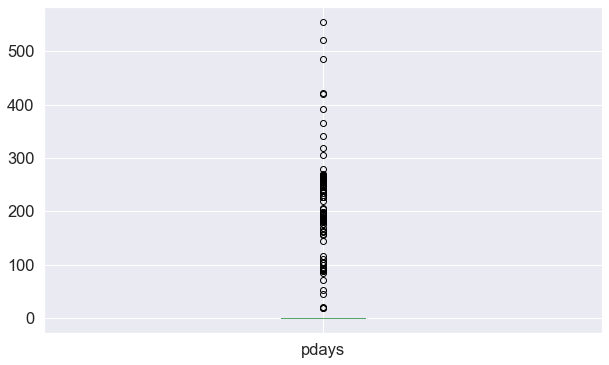

In [33]:
plt.figure(figsize=(10,6))
df.pdays.plot(kind='box')

In [34]:
df['pdays'].describe()

count    714.000000
mean      31.592437
std       85.055237
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max      555.000000
Name: pdays, dtype: float64

<AxesSubplot:>

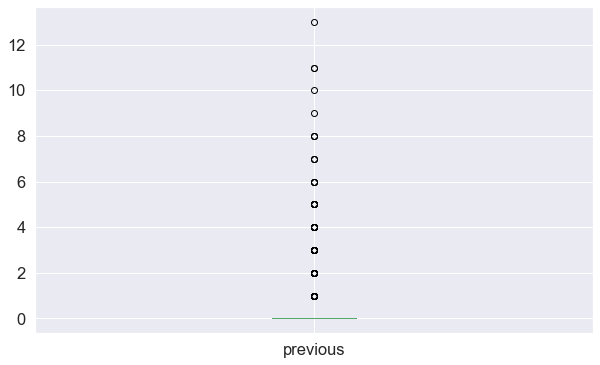

In [35]:
plt.figure(figsize=(10,6))
df.previous.plot(kind='box')

In [36]:
df['previous'].describe()

count    714.000000
mean       0.474790
std        1.475392
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       13.000000
Name: previous, dtype: float64

In [37]:
df.drop(df[df['previous']>0].index, axis=0, inplace=True)

In [38]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
5212,35,blue-collar,single,secondary,no,773,yes,no,unknown,23,may,136,2,-1,0,unknown,no
5217,39,blue-collar,married,secondary,no,439,yes,no,unknown,23,may,214,3,-1,0,unknown,no
5221,37,technician,single,secondary,no,363,yes,no,unknown,23,may,110,3,-1,0,unknown,no
5224,33,technician,single,tertiary,no,594,yes,yes,unknown,23,may,149,1,-1,0,unknown,no
5227,33,blue-collar,single,secondary,no,372,yes,no,unknown,23,may,92,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44880,38,management,married,tertiary,no,845,no,no,cellular,23,sep,134,1,-1,0,unknown,no
44909,39,technician,married,tertiary,no,386,no,no,cellular,29,sep,201,2,-1,0,unknown,no
45100,34,blue-collar,married,secondary,no,152,no,no,cellular,25,oct,275,1,-1,0,unknown,no
45108,36,technician,married,tertiary,no,844,yes,yes,cellular,25,oct,129,1,-1,0,unknown,no


In [39]:
def preprocessor(df):
    res_df=df.copy()
    le=preprocessing.LabelEncoder()
    res_df['job']=le.fit_transform(res_df['job'])
    res_df['marital']=le.fit_transform(res_df['marital'])
    res_df['education']=le.fit_transform(res_df['education'])
    res_df['default']=le.fit_transform(res_df['default'])
    res_df['housing']=le.fit_transform(res_df['housing'])
    res_df['loan']=le.fit_transform(res_df['loan'])
    res_df['contact']=le.fit_transform(res_df['contact'])
    res_df['month']=le.fit_transform(res_df['month'])
    res_df['poutcome']=le.fit_transform(res_df['job'])
    res_df['Target']=le.fit_transform(res_df['job'])
    return res_df

In [40]:
encoded_df=preprocessor(df)
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
5212,35,1,2,1,0,773,1,0,2,23,8,136,2,-1,0,1,1
5217,39,1,1,1,0,439,1,0,2,23,8,214,3,-1,0,1,1
5221,37,9,2,1,0,363,1,0,2,23,8,110,3,-1,0,9,9
5224,33,9,2,2,0,594,1,1,2,23,8,149,1,-1,0,9,9
5227,33,1,2,1,0,372,1,0,2,23,8,92,1,-1,0,1,1


In [41]:
x=encoded_df.drop('Target',axis=1).values
y=encoded_df['Target'].values

In [42]:
#split data into train and test database

x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [43]:
#Decision tree with depth 2

model_df_2=DecisionTreeClassifier(random_state=1,max_depth=2)

model_df_2.fit(x_train,y_train)

model_df_2_score_train=model_df_2.score(x_train,y_train)

model_df_2_score_test=model_df_2.score(x_test,y_test)

print('Training score',model_df_2_score_train)

print('Testing score',model_df_2_score_test)

Training score 0.7768595041322314
Testing score 0.768595041322314


In [44]:
#Decision tree with depth 4

model_df_4=DecisionTreeClassifier(random_state=1,max_depth=4)

model_df_4.fit(x_train,y_train)

model_df_4_score_train=model_df_4.score(x_train,y_train)

model_df_4_score_test=model_df_4.score(x_test,y_test)

print('Training score',model_df_4_score_train)

print('Testing score',model_df_4_score_test)

Training score 0.9669421487603306
Testing score 0.9586776859504132


In [45]:
#Decision tree with depth 6

model_df_6=DecisionTreeClassifier(random_state=1,max_depth=6)

model_df_6.fit(x_train,y_train)

model_df_6_score_train=model_df_6.score(x_train,y_train)

model_df_6_score_test=model_df_6.score(x_test,y_test)

print('Training score',model_df_6_score_train)

print('Testing score',model_df_6_score_test)

Training score 1.0
Testing score 0.9917355371900827


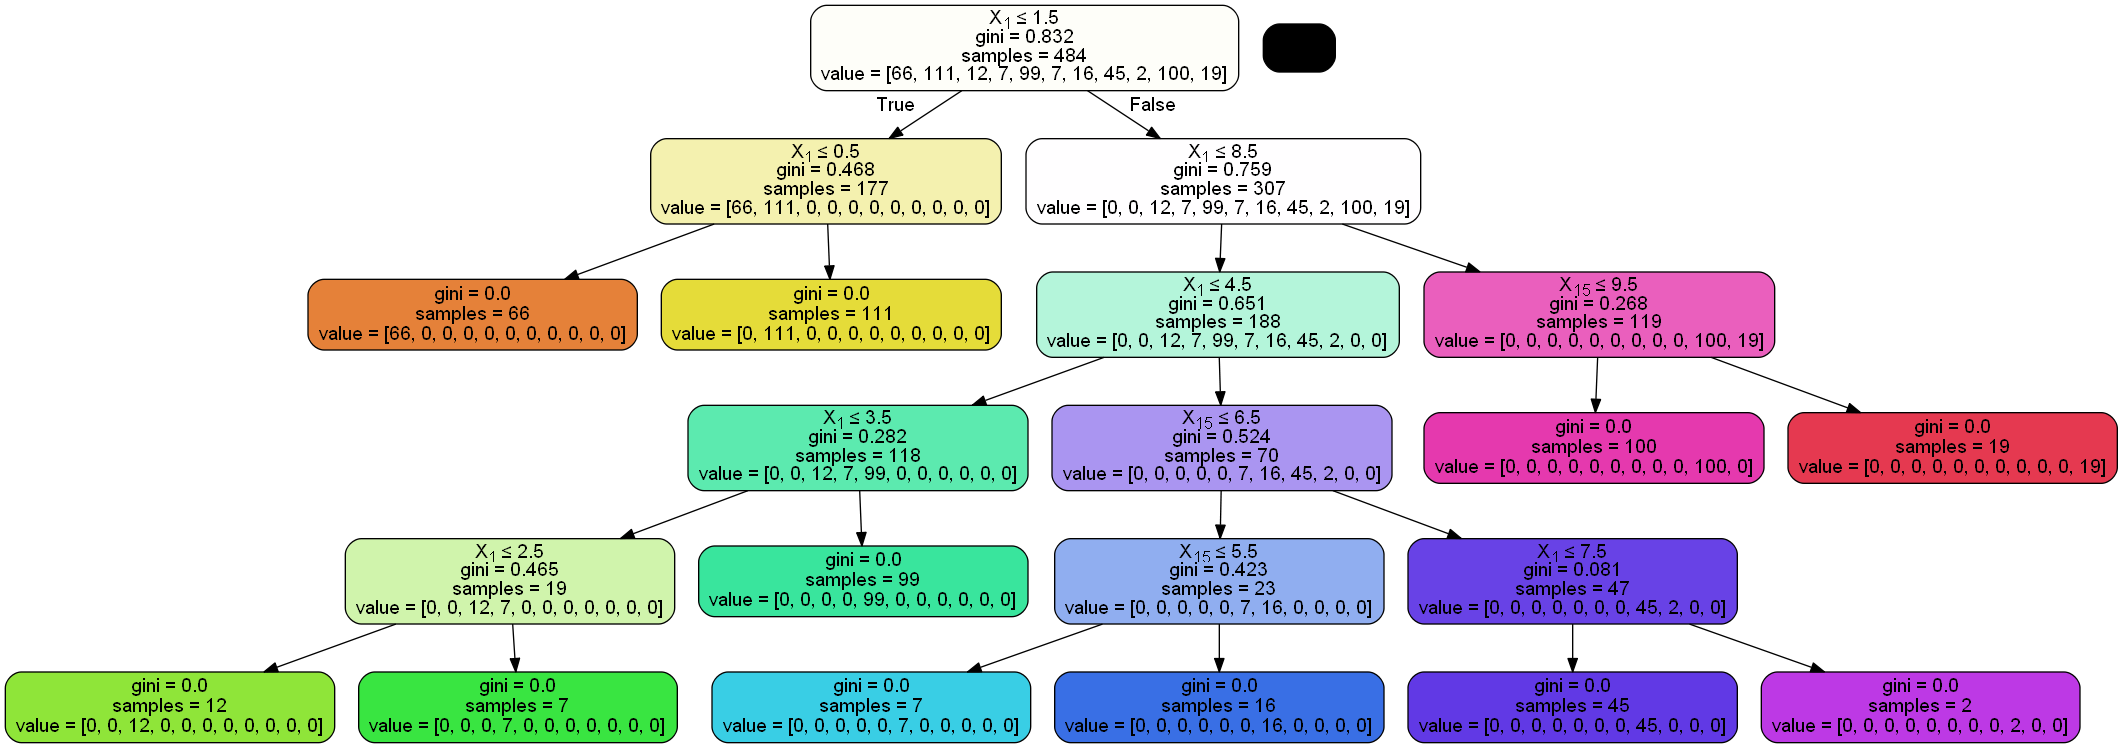

<Figure size 720x1440 with 0 Axes>

In [46]:
plt.figure(figsize=(10,20))
dot_data=StringIO()
export_graphviz(model_df_6,out_file=dot_data,filled=True,rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [47]:
plt.figure(figsize=(10,20))
dot_data=StringIO()
export_graphviz(model_dt,out_file=dot_data,filled=True,rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'model_dt' is not defined

<Figure size 720x1440 with 0 Axes>